#**Electric Vehicle Market Segmentation and Analysis**

---


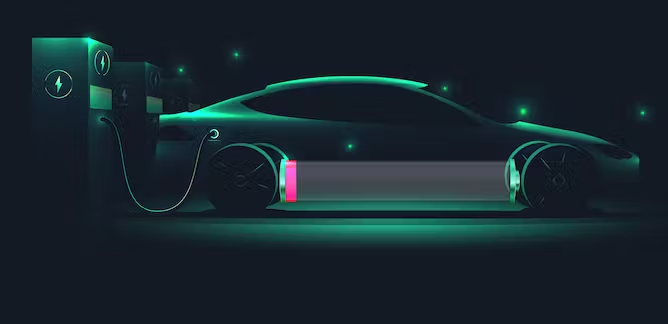

####Objective

The objective of this notebook is to analyse the EV market for an EV start-up


---



#### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the data

In [ ]:
df=pd.read_excel("/content/EV Market segmentation.xlsx")

In [ ]:
df.head()

,States,2wheeler,3wheeler,4wheeler,Bus,Total,EVSTATIONS,PCINCOME,PetrolPrices,DieselPrices,Avg.annualhightempcelsius,Avg.annuallowtempcelsius,Avgunitrate,AirQualityIndex
0,UttarPradesh,27000,113400,0,1860,142260,207,65431,96.53,89.71,33.0,18.0,6.50,105
1,Maharashtra,105300,2700,10800,1022,119822,317,202130,109.24,95.59,34.0,17.0,6.74,120
2,Bihar,5400,39550,0,0,44950,37,46292,107.24,94.04,31.0,20.0,8.05,179
3,WestBengal,1958,0,0,0,1958,141,121463,106.03,92.76,32.0,22.0,9.21,152
4,MadhyaPradesh,2327,945,608,58,3938,235,98418,108.67,93.93,32.0,19.0,6.74,65


Dataset contains state wise information of Electrnic vehicles segmented as 2-wheeler, 3-wheeler, 4-wheeler and Buses


---



#### Analysing the Dataset

In [ ]:
df.describe()

,2wheeler,3wheeler,4wheeler,Bus,Total,EVSTATIONS,PCINCOME,PetrolPrices,DieselPrices,Avg.annualhightempcelsius,Avg.annuallowtempcelsius,Avgunitrate,AirQualityIndex
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,12316.666667,6800.138889,1009.750000,113.472222,20239.972222,80.416667,172507.500000,100.108611,90.125556,26.874444,19.895278,6.753056,94.777778
std,25231.999962,20585.224127,2209.438692,370.275533,36490.205964,102.290168,96572.294466,6.600040,4.542189,8.647019,6.552553,1.845530,40.878294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46292.000000,81.450000,82.250000,-5.520000,5.230000,3.400000,15.000000
25%,17.000000,66.250000,3.750000,0.000000,458.000000,6.500000,96313.500000,96.302500,86.190000,21.750000,17.000000,5.987500,64.000000
50%,1227.000000,704.500000,121.500000,0.000000,1885.000000,22.500000,159985.500000,99.550000,90.000000,30.500000,20.000000,6.875000,87.500000
75%,3375.000000,1350.000000,616.750000,10.500000,28907.000000,148.750000,219224.000000,104.832500,94.182500,32.250000,23.000000,7.912500,130.000000
max,105300.000000,113400.000000,10800.000000,1860.000000,142260.000000,317.000000,435959.000000,110.480000,98.270000,34.000000,35.000000,11.000000,179.000000


Here we will get the statistical information about every column like count, mean, standard deviation (std), minimum value (min), maximum value (max), etc.


---



#### Checking for Null values in the dataset

In [ ]:
df.isna().sum()

States                       0
2wheeler                     0
3wheeler                     0
4wheeler                     0
Bus                          0
Total                        0
EVSTATIONS                   0
PCINCOME                     0
PetrolPrices                 0
DieselPrices                 0
Avg.annualhightempcelsius    0
Avg.annuallowtempcelsius     0
Avgunitrate                  0
AirQualityIndex              0
dtype: int64

There is no null value present


---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   States                     36 non-null     object 
 1   2wheeler                   36 non-null     int64  
 2   3wheeler                   36 non-null     int64  
 3   4wheeler                   36 non-null     int64  
 4   Bus                        36 non-null     int64  
 5   Total                      36 non-null     int64  
 6   EVSTATIONS                 36 non-null     int64  
 7   PCINCOME                   36 non-null     int64  
 8   PetrolPrices               36 non-null     float64
 9   DieselPrices               36 non-null     float64
 10  Avg.annualhightempcelsius  36 non-null     float64
 11  Avg.annuallowtempcelsius   36 non-null     float64
 12  Avgunitrate                36 non-null     float64
 13  AirQualityIndex            36 non-null     int64  
d

#### EDA(Exploratory Data Analysis)

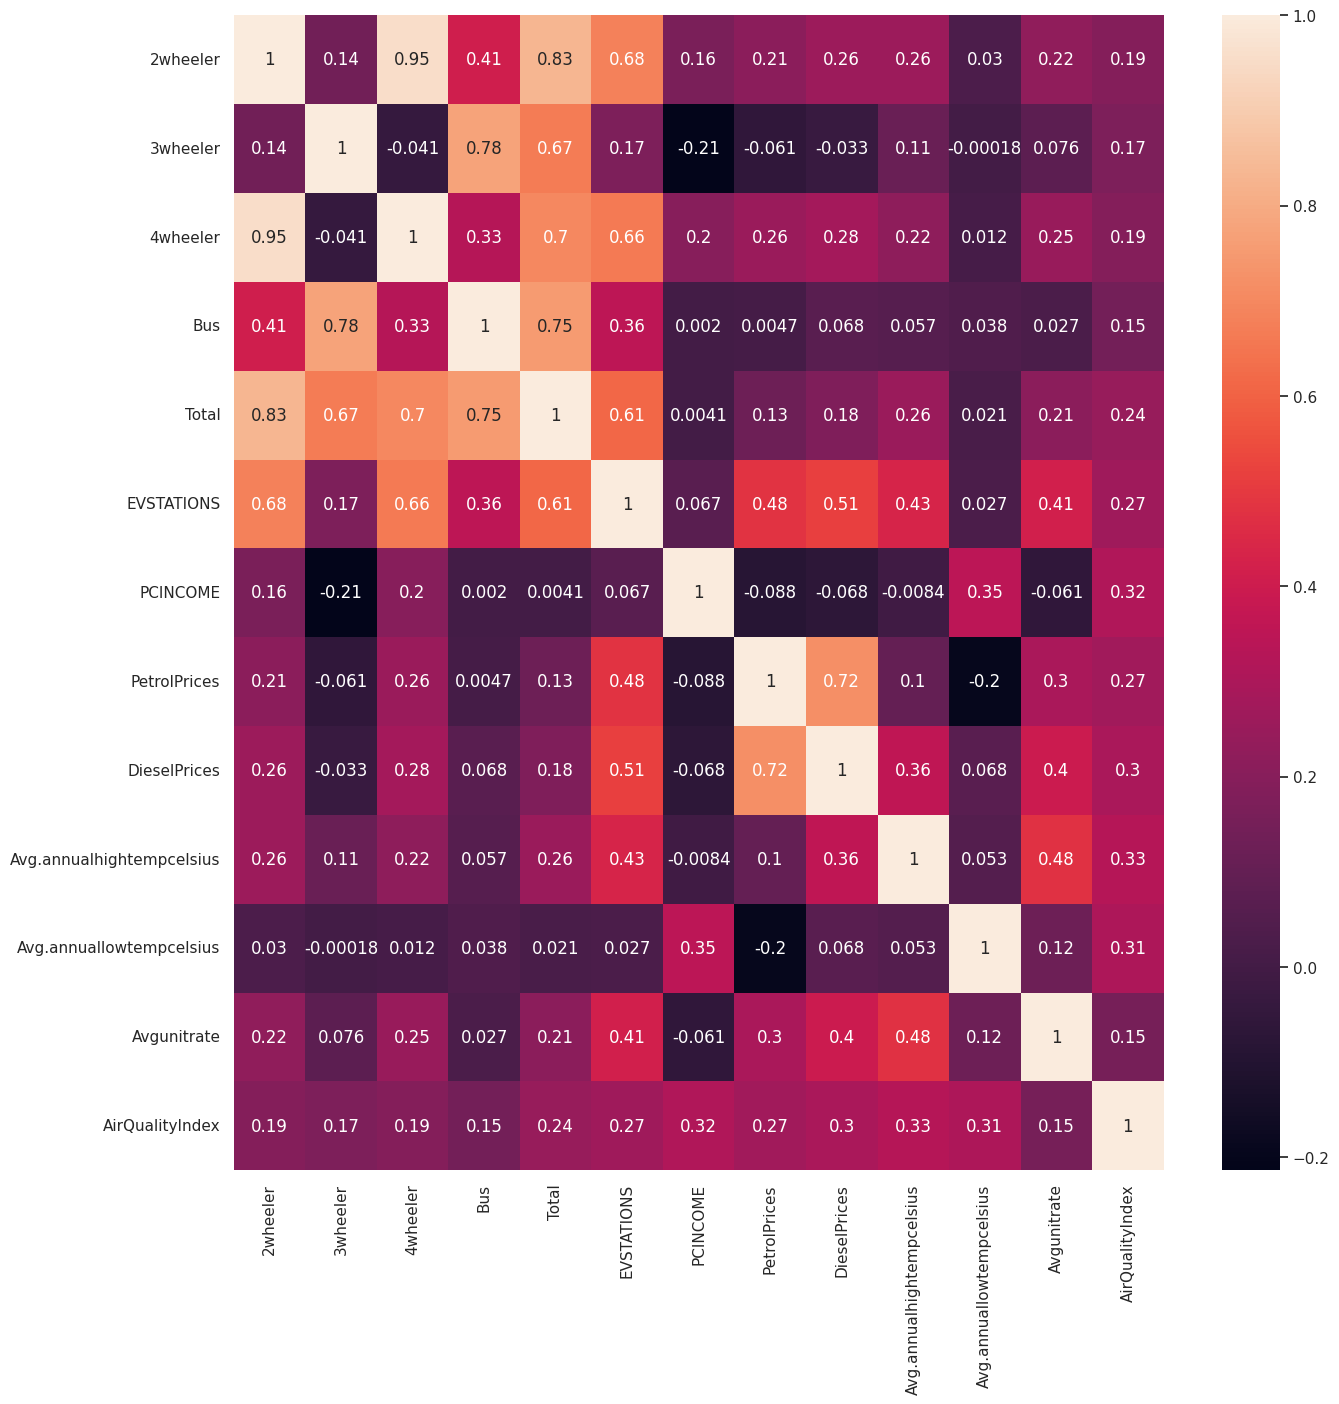

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Heatmaps are used to show relationships between two variables, one plotted on each axis
- As we can see here if the value is near to 1 then there is positive correlation between the variables
- If the value is near to -1 then there is negative correlation between the variables


---



In [ ]:
category = []
for i in df.columns:
  if df[i].dtype=='O':
    category.append(i)


for i in category:
  print('Distribution of',i)
  print(df[i].value_counts())
  print('-'*60)

Distribution of States
UttarPradesh                     1
Maharashtra                      1
Uttarakhand                      1
HimachalPradesh                  1
Tripura                          1
Meghalaya                        1
Manipur                          1
Nagaland                         1
Goa                              1
ArunachalPradesh                 1
Puducherry                       1
Mizoram                          1
Chandigarh                       1
Sikkim                           1
Dadra&NagarHaveliandDaman&Diu    1
Andaman&Nicobar                  1
Ladakh                           1
Jammu&Kashmir                    1
Delhi                            1
Haryana                          1
Gujarat                          1
Bihar                            1
WestBengal                       1
MadhyaPradesh                    1
TamilNadu                        1
Rajasthan                        1
Karnataka                        1
AndhraPradesh                   

Here from this we can conclude that there is no duplicate entries in the dataset


---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [ ]:
def display_markdown_list(items):
    """
    Display a markdown list of items.
    """
    items_formatted = "\n".join([f"- {item}" for item in items])
    display(Markdown(items_formatted))

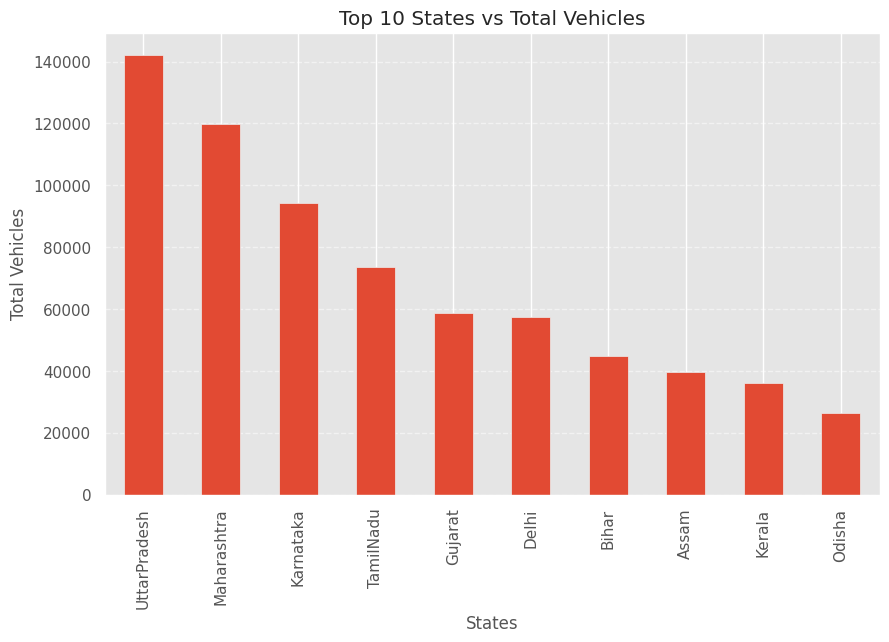

In [ ]:
#Total number of states are 36
N = 10

df_sorted = df.sort_values('Total', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

# Set plot style
plt.style.use('ggplot')

# Create a bar plot
top_states.plot(x='States', y='Total',
                kind='bar',
                stacked=True,
                title=f"Top {N} States vs Total Vehicles",
                figsize=(10, 6),
                legend=False,
                rot='vertical'
                )
# Add labels and title
plt.xlabel("States")
plt.ylabel("Total Vehicles")
plt.title(f"Top {N} States vs Total Vehicles")
# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
# Show the plot
plt.show()

Overall, UttarPradesh and Maharashtra have more number of Electric Vehicles followed by Karnataka and TamilNadu


---



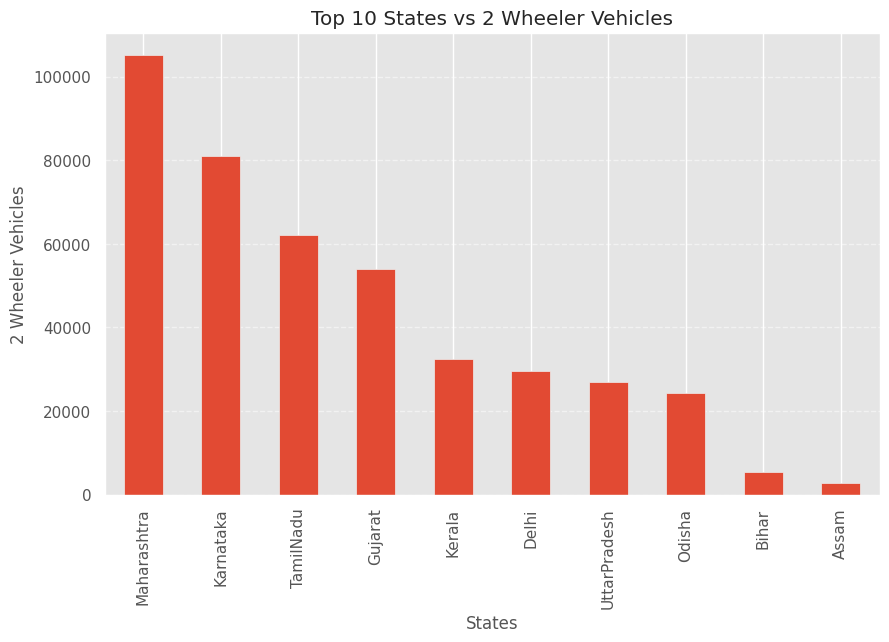

In [ ]:
N = 10

df_sorted = df.sort_values('2wheeler', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

# Set plot style
plt.style.use('ggplot')

# Create a bar plot
top_states.plot(x='States', y='2wheeler',
                kind='bar',
                stacked=False,
                title=f"Top {N} States vs 2 Wheeler Vehicles",
                figsize=(10, 6),
                legend=False,
                rot='vertical'
                )

# Add labels and title
plt.xlabel("States")
plt.ylabel("2 Wheeler Vehicles")
plt.title(f"Top {N} States vs 2 Wheeler Vehicles")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Maharashtra have the most electric vehicles in the segment of 2 Wheelers followed by Karnataka and Tamil Nadu


---



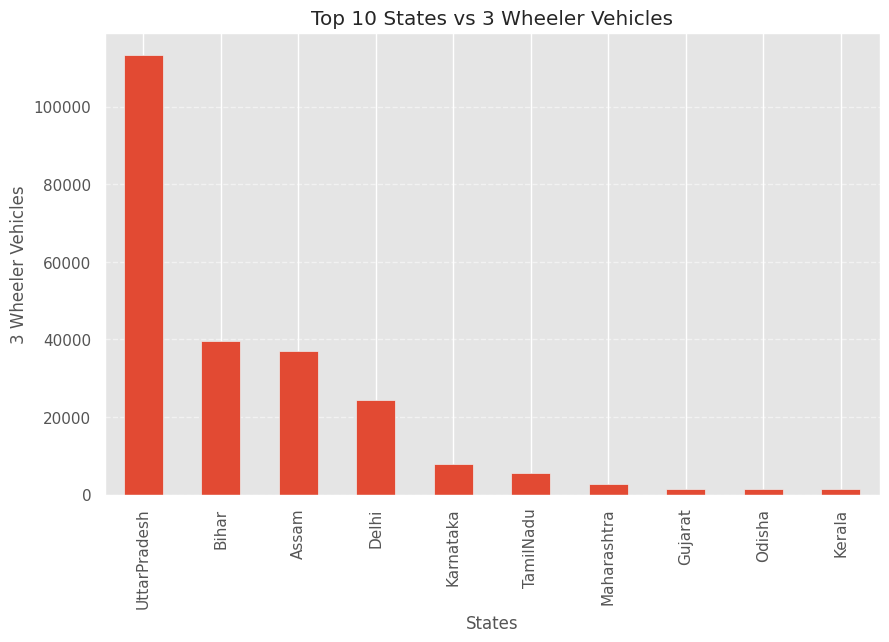

In [ ]:
N = 10

df_sorted = df.sort_values('3wheeler', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

# Set plot style
plt.style.use('ggplot')

# Create a bar plot
top_states.plot(x='States', y='3wheeler',
                kind='bar',
                stacked=False,
                title=f"Top {N} States vs 3 Wheeler Vehicles",
                figsize=(10, 6),
                legend=False,
                rot='vertical'
                )

# Add labels and title
plt.xlabel("States")
plt.ylabel("3 Wheeler Vehicles")
plt.title(f"Top {N} States vs 3 Wheeler Vehicles")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In the segment of 3 Wheelers, Uttar Pradesh is dominating the other states by a greater margin


---



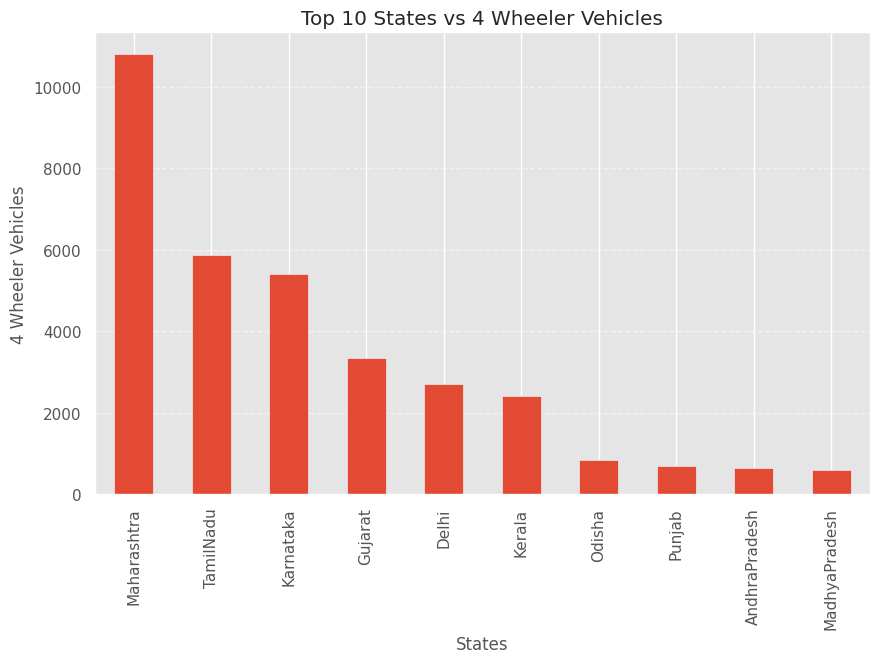

In [ ]:
N = 10

df_sorted = df.sort_values('4wheeler', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

# Set plot style
plt.style.use('ggplot')

# Create a bar plot
top_states.plot(x='States', y='4wheeler',
                kind='bar',
                stacked=True,
                title=f"Top {N} States vs 4 Wheeler Vehicles",
                figsize=(10, 6),
                legend=False,
                rot='vertical'
                )

# Add labels and title
plt.xlabel("States")
plt.ylabel("4 Wheeler Vehicles")
plt.title(f"Top {N} States vs 4 Wheeler Vehicles")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


Maharashtra is rich in the segment of 4 Wheelers


---



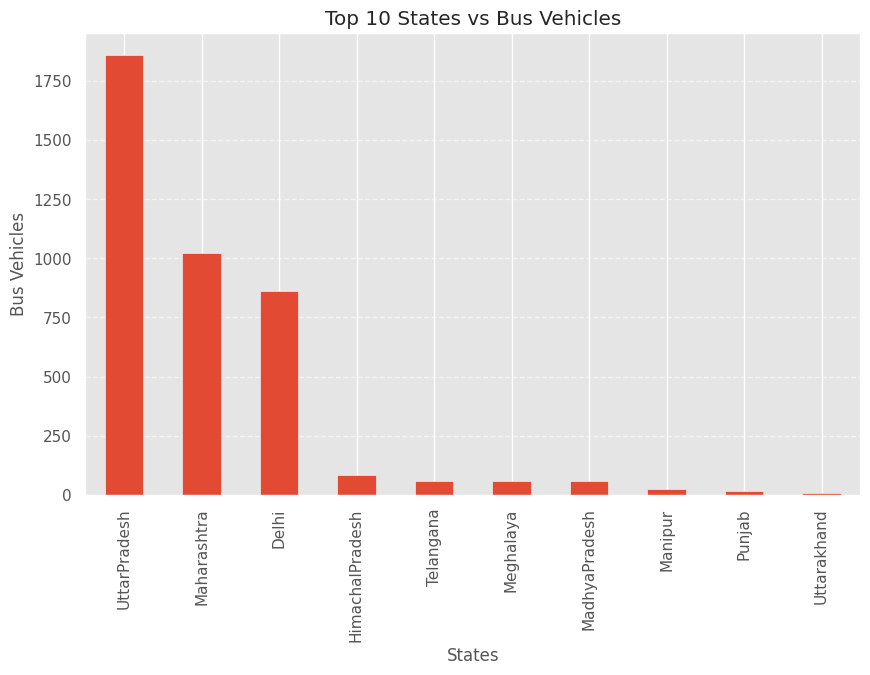

In [ ]:
N = 10

df_sorted = df.sort_values('Bus', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

# Set plot style
plt.style.use('ggplot')

# Create a bar plot
top_states.plot(x='States', y='Bus',
                kind='bar',
                stacked=False,
                title=f"Top {N} States vs Bus Vehicles",
                figsize=(10, 6),
                legend=False,
                rot='vertical'
                )

# Add labels and title
plt.xlabel("States")
plt.ylabel("Bus Vehicles")
plt.title(f"Top {N} States vs Bus Vehicles")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

Considering the number of electric buses,the sequence will be UttarPradesh followed by Maharashtra and Delhi


---

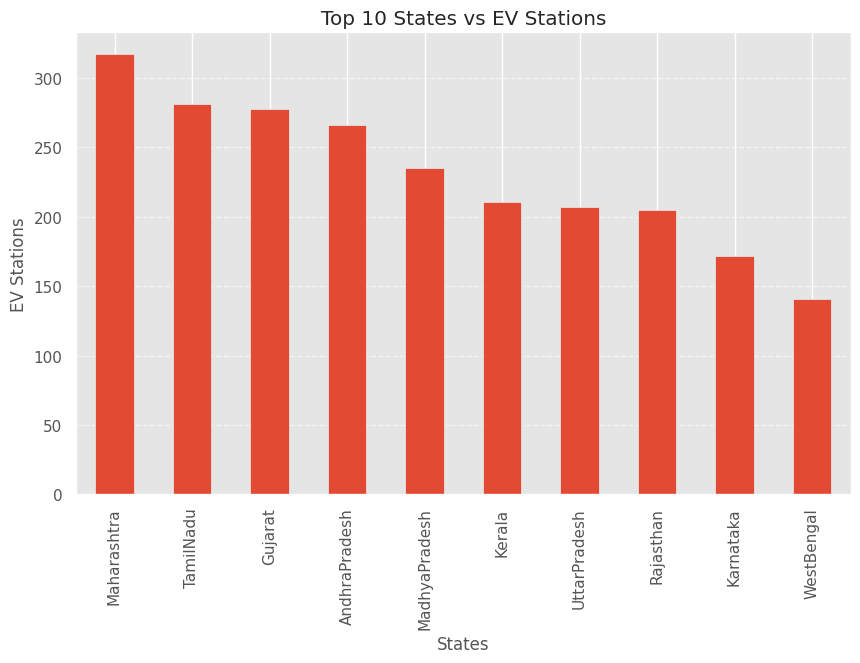

In [ ]:
N = 10

df_sorted = df.sort_values('EVSTATIONS', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

# Set plot style
plt.style.use('ggplot')

# Create a bar plot
top_states.plot(x='States', y='EVSTATIONS',
                kind='bar',
                stacked=True,
                title=f"Top {N} States vs EV Stations",
                figsize=(10, 6),
                legend=False,
                rot='vertical'
                )

# Add labels and title
plt.xlabel("States")
plt.ylabel("EV Stations")
plt.title(f"Top {N} States vs EV Stations")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

Maharashtra has the most EV stations comparing to the other states


---



#### Data Preprocessing

In [ ]:
df1=df[df['Total']>0]

In [ ]:
df1.columns.unique()

Index(['States', '2wheeler', '3wheeler', '4wheeler', 'Bus', 'Total',
       'EVSTATIONS', 'PCINCOME', 'PetrolPrices', 'DieselPrices',
       'Avg.annualhightempcelsius', 'Avg.annuallowtempcelsius', 'Avgunitrate',
       'AirQualityIndex'],
      dtype='object')

In [ ]:
df2=df1[['2wheeler', '3wheeler', '4wheeler', 'Bus', 'Total',
       'EVSTATIONS', 'PCINCOME', 'PetrolPrices','DieselPrices',
       'Avg.annualhightempcelsius', 'Avg.annuallowtempcelsius',
       'Avgunitrate', 'AirQualityIndex']]

In [ ]:
df2.head()

,2wheeler,3wheeler,4wheeler,Bus,Total,EVSTATIONS,PCINCOME,PetrolPrices,DieselPrices,Avg.annualhightempcelsius,Avg.annuallowtempcelsius,Avgunitrate,AirQualityIndex
0,27000,113400,0,1860,142260,207,65431,96.53,89.71,33.0,18.0,6.50,105
1,105300,2700,10800,1022,119822,317,202130,109.24,95.59,34.0,17.0,6.74,120
2,5400,39550,0,0,44950,37,46292,107.24,94.04,31.0,20.0,8.05,179
3,1958,0,0,0,1958,141,121463,106.03,92.76,32.0,22.0,9.21,152
4,2327,945,608,58,3938,235,98418,108.67,93.93,32.0,19.0,6.74,65


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 35
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   2wheeler                   33 non-null     int64  
 1   3wheeler                   33 non-null     int64  
 2   4wheeler                   33 non-null     int64  
 3   Bus                        33 non-null     int64  
 4   Total                      33 non-null     int64  
 5   EVSTATIONS                 33 non-null     int64  
 6   PCINCOME                   33 non-null     int64  
 7   PetrolPrices               33 non-null     float64
 8   DieselPrices               33 non-null     float64
 9   Avg.annualhightempcelsius  33 non-null     float64
 10  Avg.annuallowtempcelsius   33 non-null     float64
 11  Avgunitrate                33 non-null     float64
 12  AirQualityIndex            33 non-null     int64  
dtypes: float64(5), int64(8)
memory usage: 3.6 KB


#### Clustering using KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

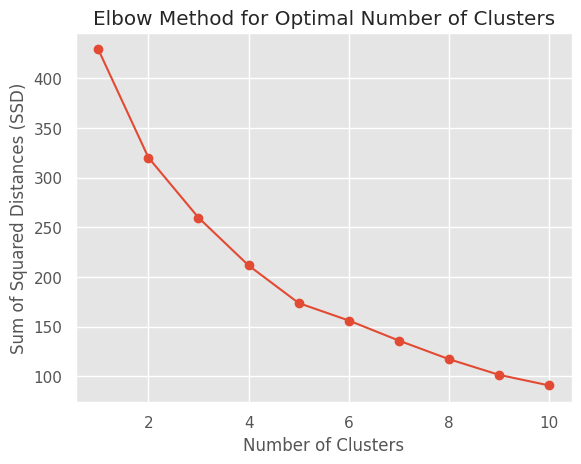

In [ ]:
# Generate SSD for different numbers of clusters
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df2_scaled)  # Replace X with your feature matrix
    ssd.append(kmeans.inertia_)  # Inertia is the sum of squared distances

# Plot the SSD
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=1) # Specify the number of clusters
kmeans.fit(df2_scaled)
df2['Cluster'] = kmeans.labels_ # Add cluster labels to DataFrame

# Explore the clusters and analyze the characteristics of each cluster
cluster_counts = df2['Cluster'].value_counts()
for cluster_label in cluster_counts.index:
    print('Cluster:', cluster_label)
    cluster_data = df2[df2['Cluster'] == cluster_label].drop(['Cluster'], axis=1)
    cluster_stats = cluster_data.describe()
    print(cluster_stats)

Cluster: 2
          2wheeler      3wheeler    4wheeler        Bus         Total  \
count    11.000000     11.000000   11.000000  11.000000     11.000000   
mean    654.636364   3889.090909  191.000000  17.454545   4752.090909   
std     932.197004  10980.742374  231.111229  28.172198  11626.533279   
min       0.000000     14.000000    0.000000   0.000000     27.000000   
25%       0.000000    370.000000    4.000000   0.000000    522.500000   
50%      19.000000    753.000000  135.000000   0.000000   1273.000000   
75%    1132.500000    894.000000  305.000000  21.000000   2252.000000   
max    2700.000000  36979.000000  697.000000  82.000000  39679.000000   

       EVSTATIONS       PCINCOME  PetrolPrices  DieselPrices  \
count   11.000000      11.000000     11.000000     11.000000   
mean    12.000000  126401.181818     96.718182     86.158182   
std     11.874342   48476.566974      5.781038      3.011358   
min      1.000000   80000.000000     81.450000     82.250000   
25%      4.

Here we can see cluster wise statistical characteristics of each variable


---




In [ ]:
kmeans.labels_

array([4, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2], dtype=int32)

5 clusters are made named as 0, 1, 2, 3, 4


---



In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df2_scaled, kmeans.labels_)

# Access inertia
inertia = kmeans.inertia_

print(f'Silhouette Score: {silhouette_avg}')
print(f'Inertia: {inertia}')

Silhouette Score: 0.22144021766562
Inertia: 174.0929396742921


- The silhouette score measures how similar data points are to their own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters, here we get the score as 0.22 which is an optimal
- Inertia is the sum of squared distances of each data point to the centroid of its assigned cluster. Lower inertia values indicate tighter and more compact clusters, here we get the value of inertia as 174 which is an optimal value


---



In [ ]:
df2['States']=df['States']

In [ ]:
df2.head()

,2wheeler,3wheeler,4wheeler,Bus,Total,EVSTATIONS,PCINCOME,PetrolPrices,DieselPrices,Avg.annualhightempcelsius,Avg.annuallowtempcelsius,Avgunitrate,AirQualityIndex,Cluster,States
0,27000,113400,0,1860,142260,207,65431,96.53,89.71,33.0,18.0,6.50,105,4,UttarPradesh
1,105300,2700,10800,1022,119822,317,202130,109.24,95.59,34.0,17.0,6.74,120,0,Maharashtra
2,5400,39550,0,0,44950,37,46292,107.24,94.04,31.0,20.0,8.05,179,3,Bihar
3,1958,0,0,0,1958,141,121463,106.03,92.76,32.0,22.0,9.21,152,3,WestBengal
4,2327,945,608,58,3938,235,98418,108.67,93.93,32.0,19.0,6.74,65,3,MadhyaPradesh


In [ ]:
#the names of states in each cluster
for i in range(5):
    print(f'Cluster {i}:')
    print(df2[df2['Cluster']==i]['States'].values)

Cluster 0:
['Maharashtra' 'TamilNadu' 'Karnataka' 'Gujarat']
Cluster 1:
['Haryana' 'Delhi' 'Goa' 'ArunachalPradesh' 'Puducherry' 'Chandigarh'
 'Sikkim' 'Dadra&NagarHaveliandDaman&Diu']
Cluster 2:
['Assam' 'Punjab' 'Jammu&Kashmir' 'Uttarakhand' 'HimachalPradesh'
 'Tripura' 'Meghalaya' 'Manipur' 'Mizoram' 'Ladakh' 'Lakshadweep']
Cluster 3:
['Bihar' 'WestBengal' 'MadhyaPradesh' 'Rajasthan' 'AndhraPradesh' 'Odisha'
 'Telangana' 'Kerala' 'Jharkhand']
Cluster 4:
['UttarPradesh']


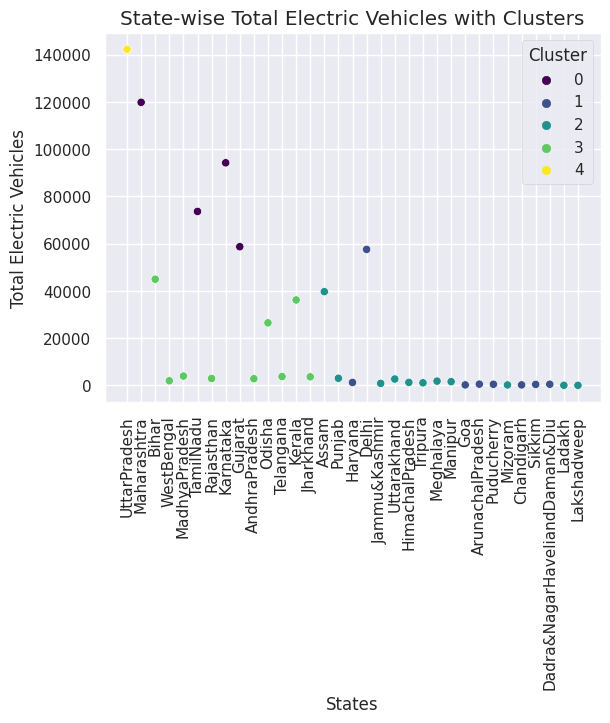

In [ ]:
# Set plot style
sns.set_style("darkgrid")

# Create a scatter plot with clusters
sns.scatterplot(x='States', y='Total', hue='Cluster', data=df2, palette='viridis')

# Add labels and title
plt.xlabel("States")
plt.ylabel("Total Electric Vehicles")
plt.title("State-wise Total Electric Vehicles with Clusters")

# Add legend
plt.legend(title='Cluster')

# Set x-axis labels to vertical orientation for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


- The plot shows different clusters represented by different colors. Here we can see the distribution of states in each cluster which provides insights into how states are grouped based on the total number of electric vehicles
- Here we can see the states from different regions are having similar characteristics as they are grouped in the same cluster, which indicates common factors influencing electric vehicle adoption or usage


---



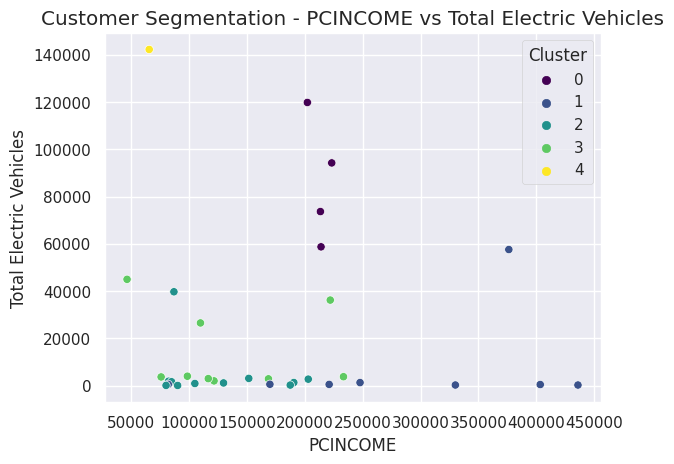

In [ ]:
# Scatter plot of two columns with cluster colors
sns.scatterplot(x='PCINCOME', y='Total', hue='Cluster', data=df2, palette='viridis')
plt.xlabel('PCINCOME')
plt.ylabel('Total Electric Vehicles')
plt.title('Customer Segmentation - PCINCOME vs Total Electric Vehicles')
plt.show()

- We can observe the distribution of States based on the income (PCINCOME) and the total number of electric vehicles in it (TOTALEVVEHICLES)
- We can identify patterns such as lower-income states tending to own more electric vehicles


---



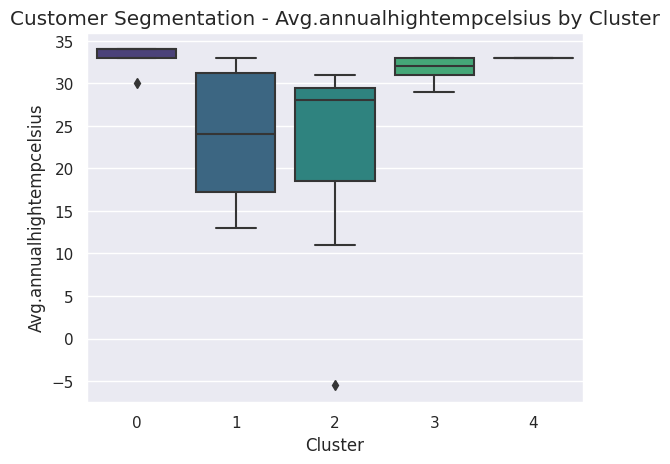

In [ ]:
# Box plot of a column by cluster
sns.boxplot(x='Cluster', y='Avg.annualhightempcelsius', data=df2, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Avg.annualhightempcelsius')
plt.title('Customer Segmentation - Avg.annualhightempcelsius by Cluster')
plt.show()

- We can see the distribution of the average annual high temperature in Celsius for each state cluster
- At optimal temperatures, EVs are performing better than their rated range, peaking at 115% at 70F or 21.5C. So, most EV owners are exceeding the rated range of the vehicle in prime temperature conditions. As you turn up or down the temperature, however, the loss of range is apparent
- So, here we can focus on the clusters 1 and 2 as they have the states having annual high temperature near to the 21.5C
---



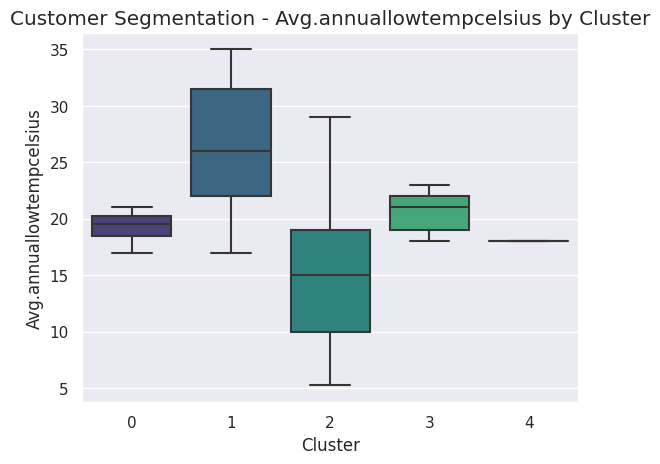

In [ ]:
# Box plot of a column by cluster
sns.boxplot(x='Cluster', y='Avg.annuallowtempcelsius', data=df2, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Avg.annuallowtempcelsius')
plt.title('Customer Segmentation - Avg.annuallowtempcelsius by Cluster')
plt.show()

- We can see the distribution of the average annual low temperature in Celsius for each state cluster
- At optimal temperatures, EVs are performing better than their rated range, peaking at 115% at 70F or 21.5C. So, most EV owners are exceeding the rated range of the vehicle in prime temperature conditions. As you turn up or down the temperature, however, the loss of range is apparent
- So, here we can the cluster 3 is the most favourable cluster

---



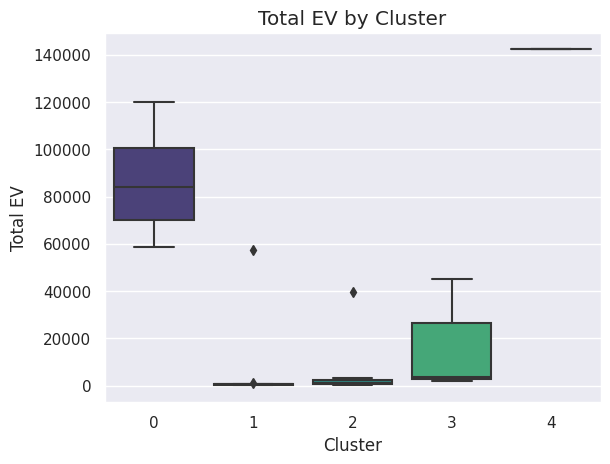

In [ ]:
# Box plot of Total EV Vehicles by Cluster
sns.boxplot(x='Cluster', y='Total', data=df2, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Total EV')
plt.title('Total EV by Cluster')
plt.show()

- We can see the distribution of Total Electric vehicles for each state cluster
- 5th cluster has less number of states than others but it has the highest number of Electric vehicles followed by 1st cluster
- Cluster named 1 and 2 have outliers that means there is one state in both the cluster which has significantly more EVs than the rest in the corresponding cluster

---



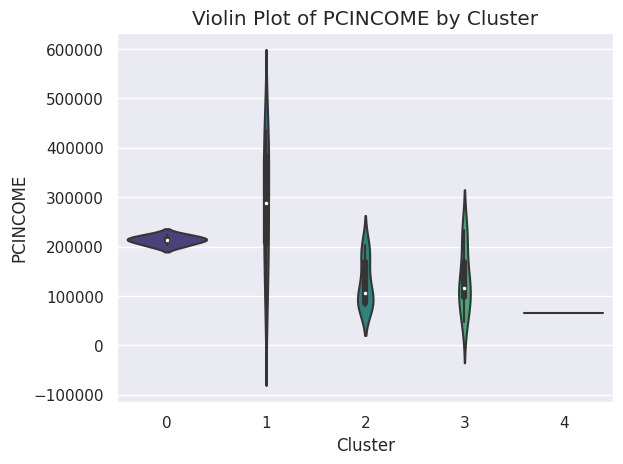

In [ ]:
# Violin plot of PCINCOME by Cluster
sns.violinplot(x='Cluster', y='PCINCOME', data=df2, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('PCINCOME')
plt.title('Violin Plot of PCINCOME by Cluster')
plt.show()

- With this violin plot we can see the distribution of a PCINCOME among different clusters or segments, similar to a box plot, but with additional information about the density of values.
-  Such as in the 1st cluster the density is maximum at Rs.2,00,000 which means in the 1st cluster the states having Per Capita income Rs.2,00,000 are more


---




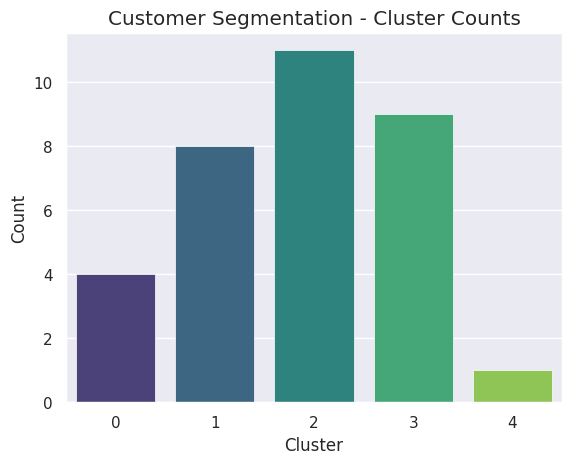

In [ ]:
# Bar plot of cluster counts
cluster_counts = df2['Cluster'].value_counts()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Customer Segmentation - Cluster Counts')
plt.show()

- Here we can see the counts of states in each cluster, providing an overview of the size and composition of each segment


---



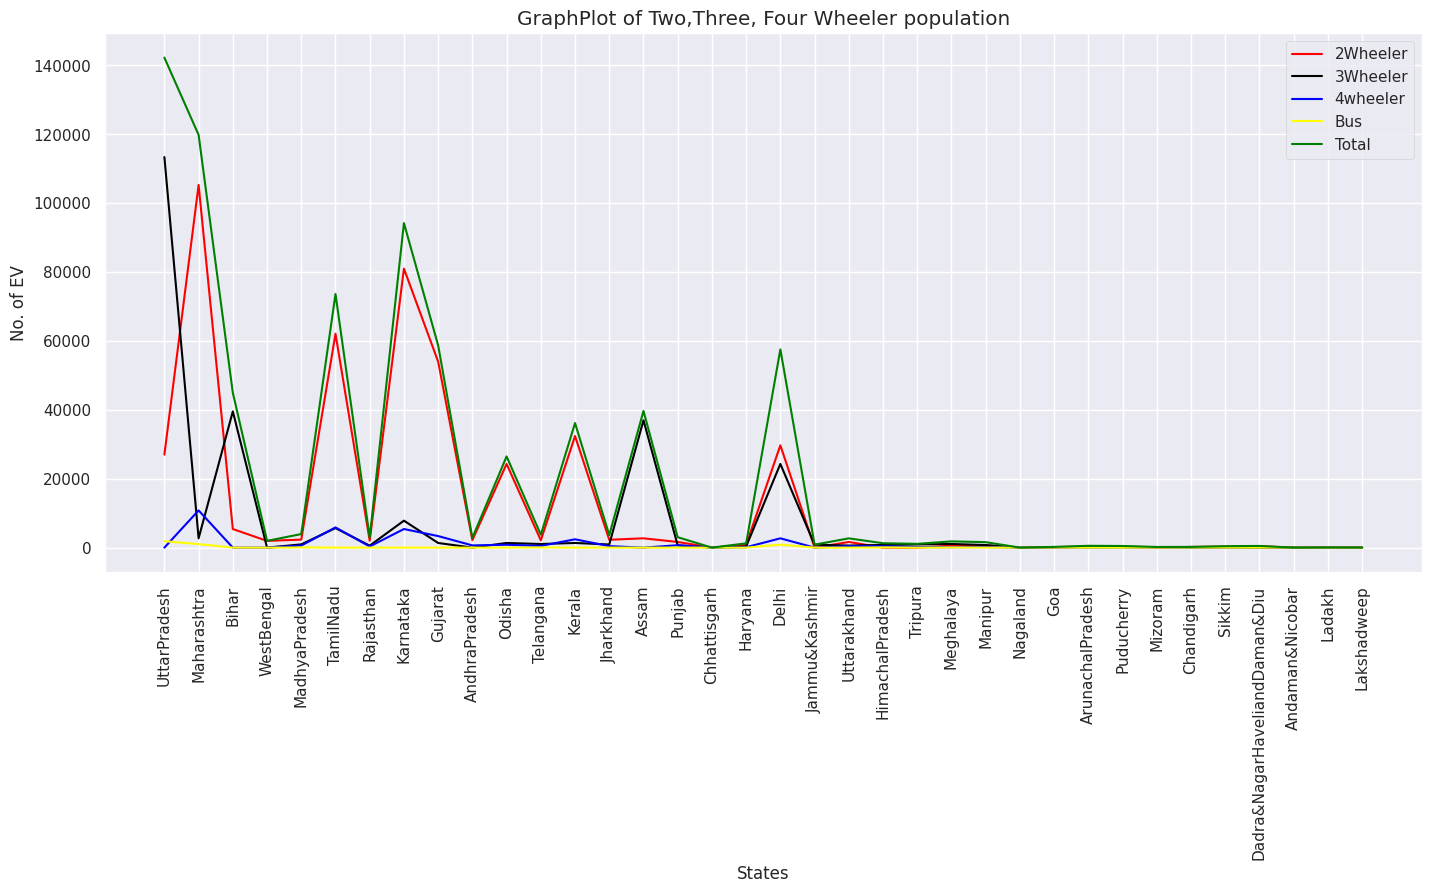

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(df['States'],df['2wheeler'],label='2Wheeler',color="Red")
plt.plot(df['States'],df['3wheeler'],label='3Wheeler',color='black')
plt.plot(df['States'],df['4wheeler'],label='4wheeler',color='blue')
plt.plot(df['States'],df['Bus'],label='Bus',color='Yellow')
plt.plot(df['States'],df['Total'],label='Total',color='green')
plt.xlabel('States')
plt.ylabel('No. of EV')
plt.title('GraphPlot of Two,Three, Four Wheeler population')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

UttarPradesh, Maharashtra, Karnataka, Tamil Nadu and Delhi are the states where we can see significant number of Electric Vehicles followed by Assam, Kerala and Odisha


---

# EDA-2


In [ ]:
df2.head()

,2wheeler,3wheeler,4wheeler,Bus,Total,EVSTATIONS,PCINCOME,PetrolPrices,DieselPrices,Avg.annualhightempcelsius,Avg.annuallowtempcelsius,Avgunitrate,AirQualityIndex,Cluster,States
0,27000,113400,0,1860,142260,207,65431,96.53,89.71,33.0,18.0,6.50,105,4,UttarPradesh
1,105300,2700,10800,1022,119822,317,202130,109.24,95.59,34.0,17.0,6.74,120,0,Maharashtra
2,5400,39550,0,0,44950,37,46292,107.24,94.04,31.0,20.0,8.05,179,3,Bihar
3,1958,0,0,0,1958,141,121463,106.03,92.76,32.0,22.0,9.21,152,3,WestBengal
4,2327,945,608,58,3938,235,98418,108.67,93.93,32.0,19.0,6.74,65,3,MadhyaPradesh


In [ ]:
df2['P3'] = (df2['3wheeler'] /
                 df2['3wheeler'].sum() * 100)

In [ ]:
df2['P4'] = (df2['4wheeler'] /
                 df2['4wheeler'].sum() * 100)

In [ ]:
df2['BusP'] = (df2['Bus'] /
                 df2['Bus'].sum() * 100)

In [ ]:
df2['TotalP'] = (df2['Total'] /
                 df2['Total'].sum() * 100)

In [ ]:
df2['EVSTATIONSP'] = (df2['EVSTATIONS'] /
                df2['EVSTATIONS'].sum() * 100)

In [ ]:
df2['TwoWP'] = (df2['2wheeler'] /
                 df2['2wheeler'].sum() * 100)

In [ ]:
df2.head()

,2wheeler,3wheeler,4wheeler,Bus,Total,EVSTATIONS,PCINCOME,PetrolPrices,DieselPrices,Avg.annualhightempcelsius,...,Avgunitrate,AirQualityIndex,Cluster,States,P3,P4,BusP,TotalP,EVSTATIONSP,TwoWP
0,27000,113400,0,1860,142260,207,65431,96.53,89.71,33.0,...,6.50,105,4,UttarPradesh,46.322583,0.000000,45.532436,19.524072,7.150259,6.089310
1,105300,2700,10800,1022,119822,317,202130,109.24,95.59,34.0,...,6.74,120,0,Maharashtra,1.102919,29.710324,25.018360,16.444632,10.949914,23.748309
2,5400,39550,0,0,44950,37,46292,107.24,94.04,31.0,...,8.05,179,3,Bihar,16.155716,0.000000,0.000000,6.169036,1.278066,1.217862
3,1958,0,0,0,1958,141,121463,106.03,92.76,32.0,...,9.21,152,3,WestBengal,0.000000,0.000000,0.000000,0.268720,4.870466,0.441588
4,2327,945,608,58,3938,235,98418,108.67,93.93,32.0,...,6.74,65,3,MadhyaPradesh,0.386022,1.672581,1.419829,0.540460,8.117444,0.524808


Here we added columns for percentage of EVs in each segment per state


---



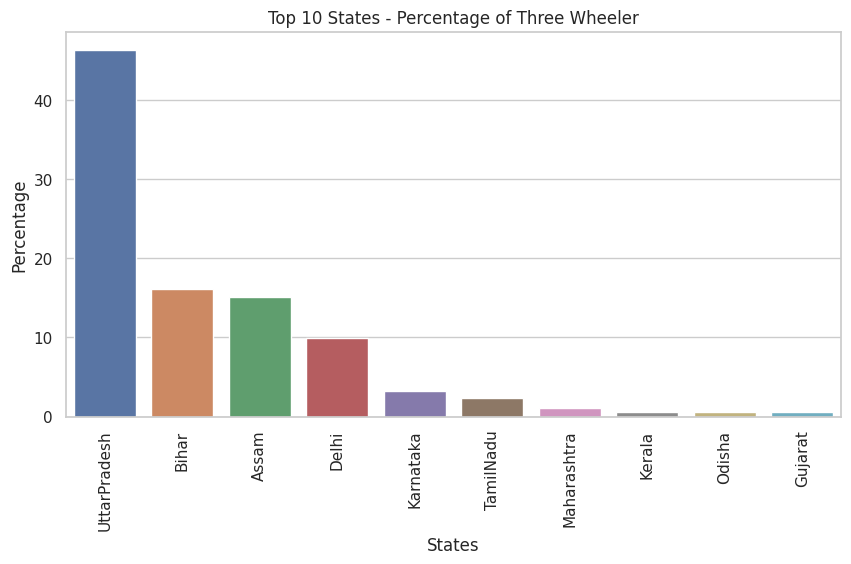

In [ ]:
N = 10

df_sorted = df2.sort_values('P3', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='States', y='P3', data=top_states)
plt.title(f"Top {N} States - Percentage of Three Wheeler")
plt.ylabel('Percentage')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()

In the segment of 3 Wheelers, Uttar Pradesh is dominating the other states by a greater margin


---



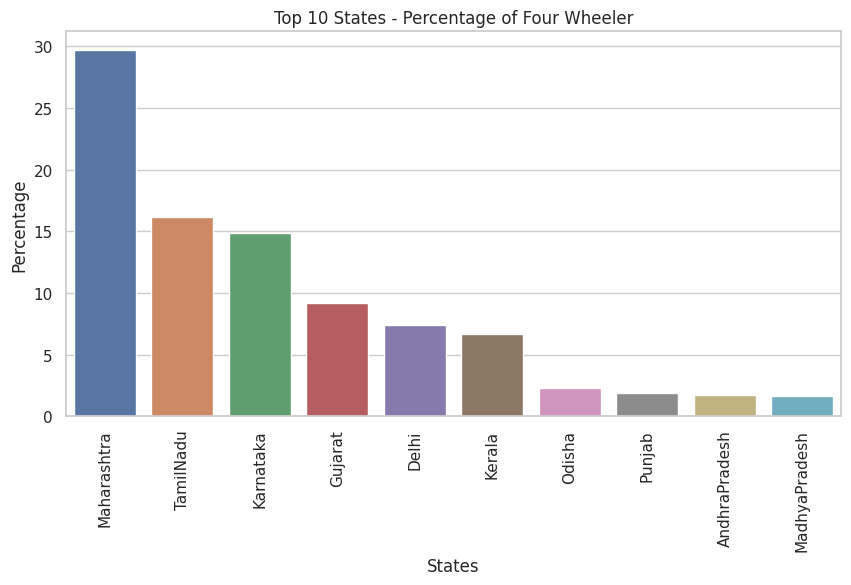

In [ ]:
N = 10

df_sorted = df2.sort_values('P4', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='States', y='P4', data=top_states)
plt.title(f"Top {N} States - Percentage of Four Wheeler")
plt.ylabel('Percentage')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()

Maharashtra is rich in the segment of 4 Wheelers


---



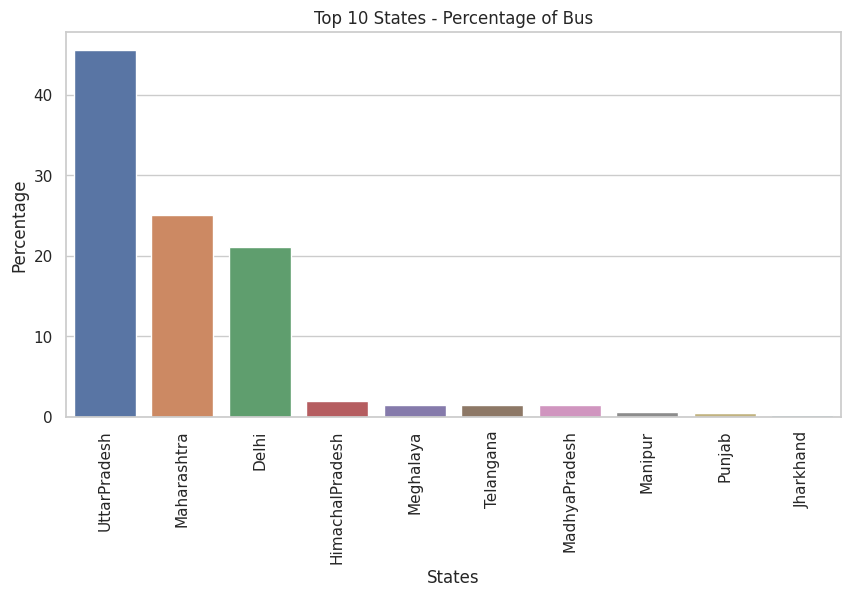

In [ ]:
import seaborn as sns

N = 10

df_sorted = df2.sort_values('BusP', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='States', y='BusP', data=top_states)
plt.title(f"Top {N} States - Percentage of Bus")
plt.ylabel('Percentage')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()


Considering the percentage of Electric buses,the sequence will be UttarPradesh followed by Maharashtra and Delhi


---

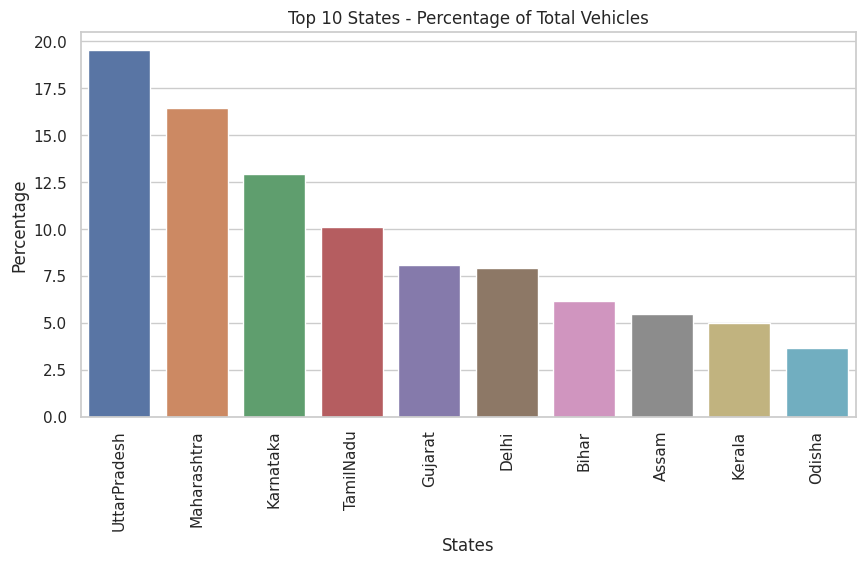

In [ ]:
N = 10

df_sorted = df2.sort_values('TotalP', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='States', y='TotalP', data=top_states)
plt.title(f"Top {N} States - Percentage of Total Vehicles")
plt.ylabel('Percentage')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()

Overall, UttarPradesh and Maharashtra are having more percentage of Electric Vehicles followed by Karnataka and TamilNadu


---



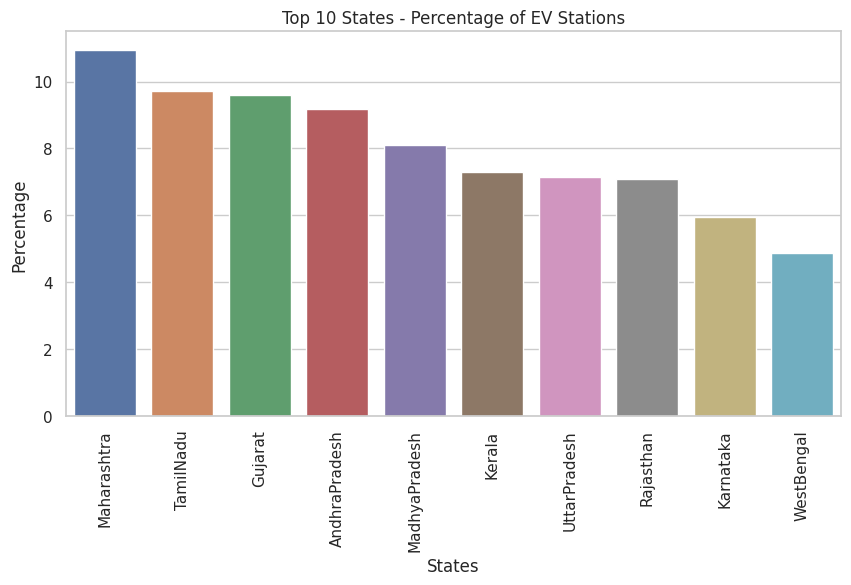

In [ ]:
N = 10

df_sorted = df2.sort_values('EVSTATIONSP', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='States', y='EVSTATIONSP', data=top_states)
plt.title(f"Top {N} States - Percentage of EV Stations")
plt.ylabel('Percentage')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()

Maharashtra have the most EV stations comparing to the other states


---



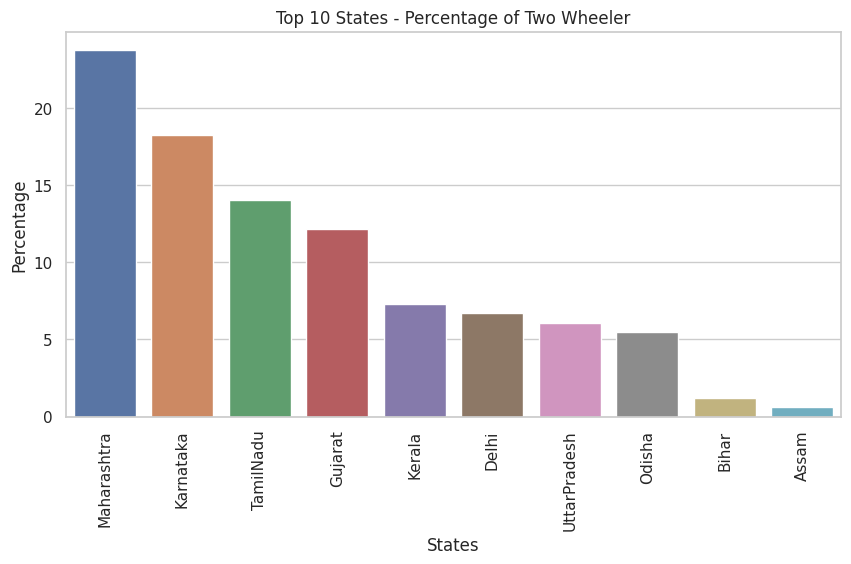

In [ ]:
N = 10

df_sorted = df2.sort_values('TwoWP', ascending=False)

# Select the top N states
top_states = df_sorted.head(N)

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='States', y='TwoWP', data=top_states)
plt.title(f"Top {N} States - Percentage of Two Wheeler")
plt.ylabel('Percentage')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()

Maharashtra have the most percentage of electric vehicles in the segment of 2 Wheelers followed by Karnataka and Tamil Nadu


---



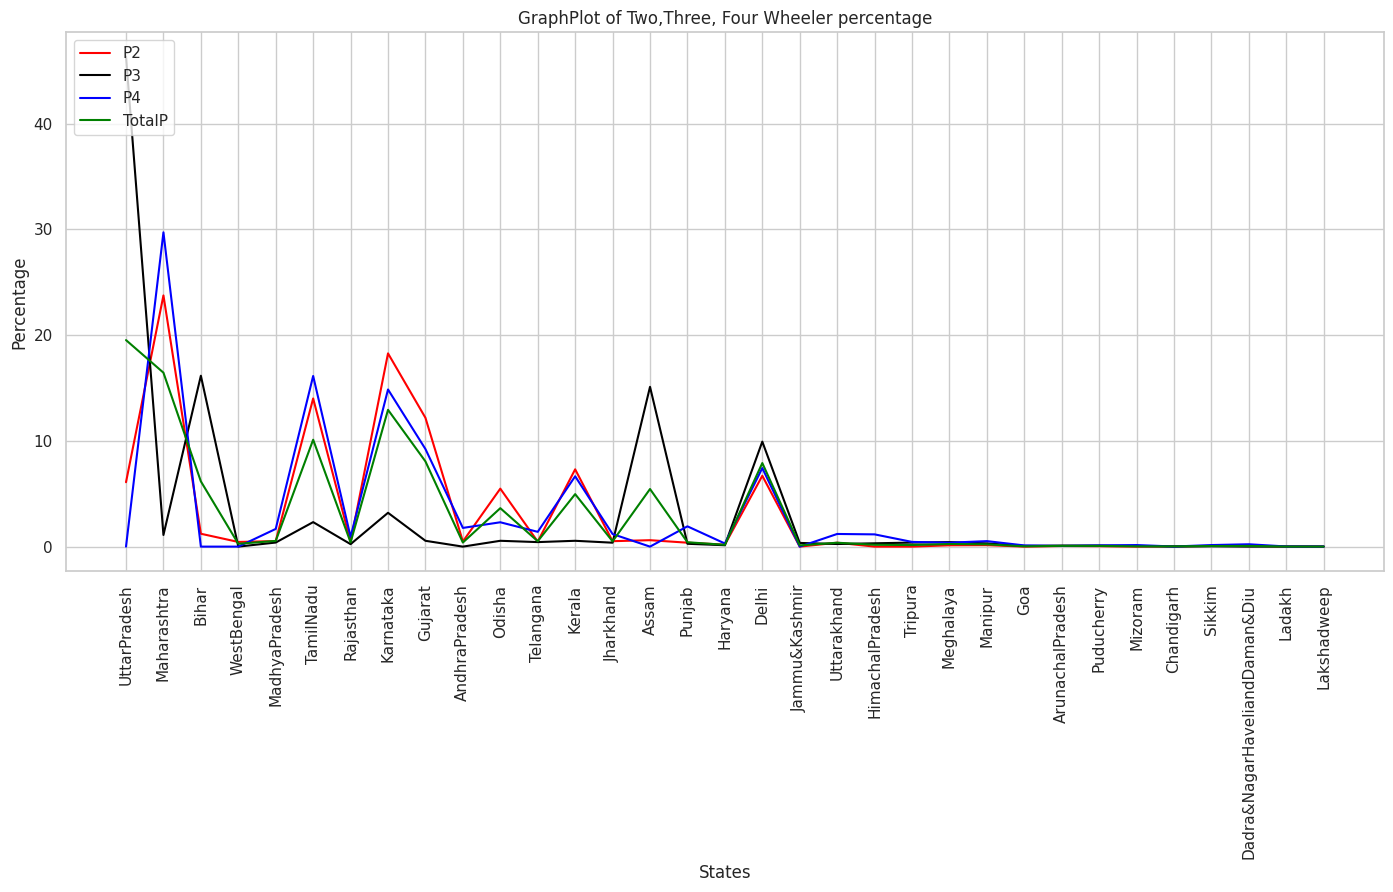

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(df2['States'],df2['TwoWP'],label='P2',color="Red")
plt.plot(df2['States'],df2['P3'],label='P3',color='black')
plt.plot(df2['States'],df2['P4'],label='P4',color='blue')
plt.plot(df2['States'],df2['TotalP'],label='TotalP',color='green')
plt.xlabel('States')
plt.ylabel('Percentage')
plt.title('GraphPlot of Two,Three, Four Wheeler percentage')
plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.show()

* UttarPradesh, Maharashtra, Karnataka, Tamil Nadu and Delhi are the states where we can see significant percentage of Electric Vehicles followed by Assam, Kerala and Odisha


---

#### Conclusion:

* It depends on a startup in which segment it wants to operate whether it's two Wheeler or four Wheeler or three Wheeler or in big transportation (Trucks, Bus etc.) vehicle.
- For 2-wheeler we can conclude that Maharashtra, Karnataka, TamilNadu are the best performing states.
- For 3-wheeler we can conclude that Uttarpradesh is the best performing state.
- For 4-wheeler we can conclude that Maharashtra is the best performing state.
- For big transportation we can conclude that Uttarpradesh, Maharashtra and Delhi are the best performing states.
